In [ ]:
# ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ - ΕΡΓΑΣΙΑ 1

### ΕΥΘΥΜΙΟΣ ΓΡΗΓΟΡΑΚΗΣ - ΑΕΜ: 9694
### ΑΝΕΣΤΗΣ ΚΑΪΜΑΚΑΜΙΔΗΣ - ΑΕΜ: 9627

In [8]:
!pip install numpy 
!pip install matplotlib
!pip install scipy

In [3]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy import integrate

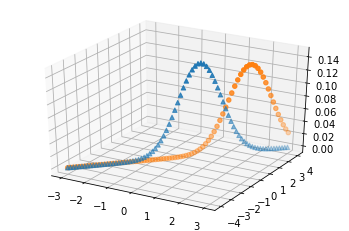

In [4]:
mean1 = np.array([0.4,0.8])
mean2 = np.array([1.5,2.7])

Sigma = np.array([[1.5, 0],
                  [0, 0.8]])

P1 = 0.95
P2 = 0.05

points = 80

x1 = np.linspace(-3,3,num = points)
x2 = np.linspace(-4,4,num = points)
        
x12 = np.linspace([-3,-4],[3,4],num = points)

p1 = np.zeros(points)
p2 = np.zeros(points)
    
for i in range(points):
    p1[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma)),(x12[i] - mean1))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))
    p2[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma)),(x12[i] - mean2))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))

fig = plt.figure()

axes = plt.axes(projection ='3d')
axes.scatter(x1, x2, p1, marker = '^')
axes.scatter(x1, x2, p2, marker = 'o')

plt.show() 

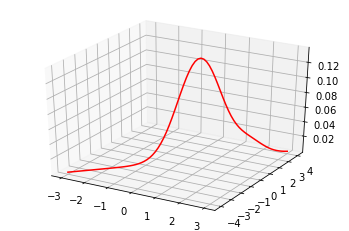

In [5]:
px = np.zeros(points)

for i in range(points):
    px[i] = p1[i] * P1 + p2[i] * p2[i]
    
fig = plt.figure()

axes = plt.axes(projection = '3d')
axes.plot3D(x1,x2,px,'red')

plt.show()

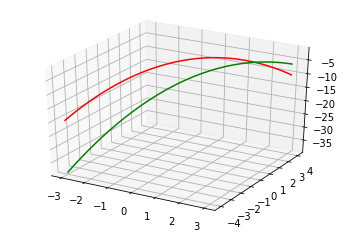

In [6]:

P1x = np.zeros(points)
P2x = np.zeros(points)

for i in range(points):
    P1x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma)),(x12[i] - mean1))/2 - np.log(np.pi) - np.log(np.linalg.det(Sigma))/2 + np.log(P1)
    P2x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma)),(x12[i] - mean2))/2 - np.log(np.pi) - np.log(np.linalg.det(Sigma))/2 + np.log(P2)
    
fig = plt.figure()

axes = plt.axes(projection = '3d')
axes.plot3D(x1,x2,P1x,'red')
axes.plot3D(x1,x2,P2x,'green')
plt.show()

In [7]:
inter_point = 0
for i in range(len(P1x)):
    if(P1x[i] <= P2x[i] and P1x[i-1] >= P2x[i-1]):
        inter_point = [x1[i], x2[i]]

f1 = lambda x,y: np.exp(-np.matmul(np.matmul(np.transpose([x,y] - mean1),np.linalg.inv(Sigma)),([x,y] - mean1))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))
f2 = lambda x,y: np.exp(-np.matmul(np.matmul(np.transpose([x,y] - mean2),np.linalg.inv(Sigma)),([x,y] - mean2))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))

error1, _ = integrate.dblquad(f1, inter_point[0], np.Inf, inter_point[1], np.Inf)
error2, _ = integrate.dblquad(f2, -np.Inf, inter_point[0], -np.Inf, inter_point[1])



print(error1, error2)
print(error1+error2)

0.0027260344030311874 0.18419429331259138
0.18692032771562256


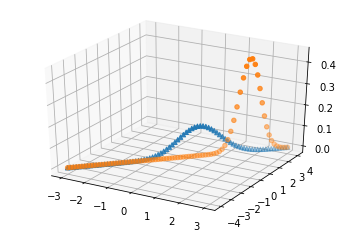

In [8]:

Sigma1 = Sigma
Sigma2 = np.array([[0.375, 0],
                    [0, 0.2]])

points = 80

p1 = np.zeros(points)
p2 = np.zeros(points)
    
for i in range(points):
    p1[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma1)),(x12[i] - mean1))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma1)))
    p2[i] = np.exp(-np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma2)),(x12[i] - mean2))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma2)))

fig = plt.figure()

axes = plt.axes(projection ='3d')
axes.scatter(x1, x2, p1, marker = '^')
axes.scatter(x1, x2, p2, marker = 'o')

plt.show() 

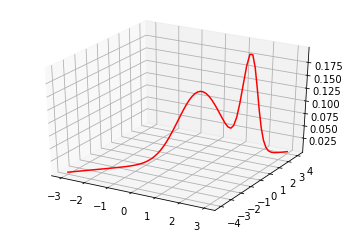

In [9]:
px = np.zeros(points)

for i in range(points):
    px[i] = p1[i] * P1 + p2[i] * p2[i]
    
fig = plt.figure()

axes = plt.axes(projection = '3d')
axes.plot3D(x1,x2,px,'red')

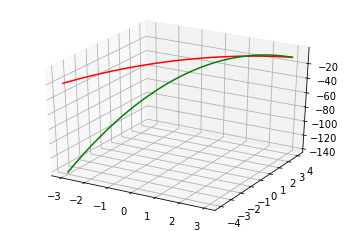

In [10]:
P1x = np.zeros(points)
P2x = np.zeros(points)

for i in range(points):
    P1x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean1),np.linalg.inv(Sigma1)),(x12[i] - mean1))/2 - np.log(np.pi) - np.log(np.linalg.det(Sigma1))/2 + np.log(P1)
    P2x[i] = -np.matmul(np.matmul(np.transpose(x12[i] - mean2),np.linalg.inv(Sigma2)),(x12[i] - mean2))/2 - np.log(np.pi) - np.log(np.linalg.det(Sigma2))/2 + np.log(P2)
    
fig = plt.figure()

axes = plt.axes(projection = '3d')
axes.plot3D(x1,x2,P1x,'red')
axes.plot3D(x1,x2,P2x,'green')
plt.show()

In [11]:
inter_point = 0
for i in range(len(P1x)):
    if(P1x[i] <= P2x[i] and P1x[i-1] >= P2x[i-1]):
        inter_point = [x1[i], x2[i]]

f1 = lambda x,y: np.exp(-np.matmul(np.matmul(np.transpose([x,y] - mean1),np.linalg.inv(Sigma)),([x,y] - mean1))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))
f2 = lambda x,y: np.exp(-np.matmul(np.matmul(np.transpose([x,y] - mean2),np.linalg.inv(Sigma)),([x,y] - mean2))/2) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))

error1, _ = integrate.dblquad(f1, inter_point[0], np.Inf, inter_point[1], np.Inf)
error2, _ = integrate.dblquad(f2, -np.Inf, inter_point[0], -np.Inf, inter_point[1])



print(error1, error2)
print(error1+error2)

0.007177876162940923 0.11692773335376179
0.12410560951670271
